<img src="https://i.ytimg.com/vi/YLGhVBB5rGU/maxresdefault.jpg" alt= "LOGO CAT" width=400 height=400 align = "right">

<br>
<h1><font color="#7F000E" size=5>TOULOUSE LAUTREC </font></h1>
<h1><font color="#7F000R" size=6> APRENDIZAJE AUTOMATICO CON PYTHON </font></h1>
<h1><font color="#7F000E" size=4> REGRESION LINEAL BASICA </font></h1>
<br>
<div style="text-align:right">
<font color="#7F000E" size=3> Ing. Alexander Valdez</font><br>
<font color="#7F000E" size=3> Curso 2290, Clases Lunes y Miercoles 20:00-22:30pm </font>
<br>
<br>
<font color="#7F000e" size=5> TAREA 1</font><br>
</div>


---

Buen dia alumnos, bienvenidos a este ejercicio de regresion lineal.

El primer paso es conseguir un dataset o conjunto de datos, para esto podemos recurri al sitio Kaggle.com, el cual entre otras cosas ofrece datasets abiertos.

En este caso usaremos el dataset kc_house_data (https://www.kaggle.com/shivachandel/kc-house-data),el cual contiene datos de distintas casas en Washington, EEUU.

Puedes descargar el conjunto de datos desde este enlace:
https://drive.google.com/file/d/1R_etes5KRoe2g49Ks5qzioF0tPLbXUpw/view?usp=drive_link

Una vez lo tengas descargado es importante que sepas donde lo dejaste guardado.

---

**NOMBRE DEL ALMUMNO:**
 Escribe aqui tu nombre...

---

# DESCARGA EL ARCHIVO


In [ ]:
import pandas as pd
# Este codigo permite importar la libreria pandas, la cual sera util para manejar los datos
#"as pd" singifica que para usar funciones de pandas debemos escribir pd.nombre_de_funcion

from google.colab import files #estas dos lineas de codigo permiten subir el archivo vsc a Google Colab clickeando "examinar"
uploaded = files.upload()


## NOTAS ##

 Esta linea se encarga de contener df en el dataframe

In [2]:
df =pd.read_csv("/content/data.csv")

Antes de hacer cualquier otra cosa es importante examinar y entender el dataset, por eso se utilizaran algunas funciones de ejemplo. Como describe, head, shape y dtypes



In [ ]:
df.describe() # la funcion describe nos muestra un buen resumen del dataset

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.head() # la funcion head nos muestra los primeros 5 elementos del dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.shape # la funcion shape nos da la forma del dataset en este formato (Cantidad de filas, cantidad de columnas)

#Las cantidad de filas representa la cantidad de casas del dataset
#La cantidad de columnas representa la cantidad de atributos o datos que tiene cada casa del dataset

(21613, 21)

In [ ]:
df.dtypes # la funcion dtypes nos muestra los tipos de variables del dataset, podemos ver que la mayoria son numeros enteros

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## CORRELACION

In [ ]:
correlations = df.corr()['price']

# la funcion corr nos permite obtener las correlaciones entre las distintas variables
# En este caso selecionamos del dataframe la variable "price" (precio), por lo cual
# obtendremos las relaciones entre esta variable y las demas
# Entre mas cercano a 1 sea el valor mayor es la correlacion y mejor es la variable para predecir "price"

print(correlations) # imprimimos los valores

## <font color="red">PRIMERA PARTE- CUESTIONARIO</font>

1.   ¿Que es el coeficiente de correlacion entre dos variables?
2.   Indicar los 4 atributos que tienena la mayor correlacion positiva.
3.   Indicar los atributos que tienen correlacion negativa.
4.   ¿Que significa una correlacion igual o cercana a 1?



## <font color="red">RESPUESTAS</font>

1.

2.

3.

4.


## <font color="red">Muestra la matrix de Correlacion</font>


Muestra la matriz de correlacion de todas las variables, utilizando las librerias matplotlib, pandas y seaborn

---

# **REGRESION LINEAL**

Al igual que con la metrica R2, entre más cercano a 1 sea el valor de correlación mejor.

Al usar la función shape la consola debería haber mostrado que el dataset contiene 21613, lo cual puede ser una cantidad incomoda para visualizar en gráficas como haremos más adelante. Por este motivo en el siguiente bloque de codigo vamos a "achicar el dataset", dejando solo 15 casas para analizar. Más adelante usaremos todo el dataset y podremos comparar resultados.

In [ ]:
df_min = df.sample(15, random_state=10) #creamos un nuevo dataset al cual copiamos 15 valores del dataset original
# random_state=10 es un valor que deberias mantener igual si quieres obtener las mismas graficas, es basicamente la forma de asegurarse de que los 15 datos que seleccionamos sean los mismos
# si pongo otro valor como random state el conjunto de 15 datos seria diferente

from sklearn.linear_model import LinearRegression # Sklearn es la libreria de machine leaarning que estaremos usando, por ahora solo usaremos su funcion de Regresion lineal
X = df_min['sqft_living'].values.reshape(-1,1) # Definimos como X los valores de la columna que contiene el área de la vivienda en pies cuadrados
# ".values.reshape(-1,1)" es necesario para luego utilizar la funcion fit, es sencillamente algo relacionado a ajustar el formato del Array no te preocupes ahora por entender del todo su funcionamiento

y = df_min['price'].values.reshape(-1,1)  # Definimos como Y la columna que contiene los precios de las viviendas




Text(0.5, 0, 'Superficie en pies cuadrados')

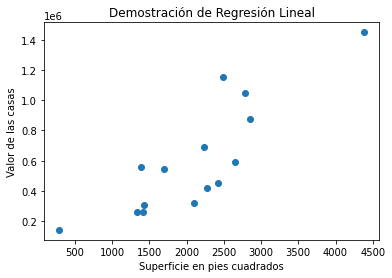

In [ ]:
import matplotlib.pyplot as plt # Esta libreria tiene herramientas para graficar


# Ahora que tenemos un conjunto de datos mas pequeño deberia ser facil graficarlo

plt.scatter(X,y) # Genera una grafica de puntos

plt.title('Demostración de Regresión Lineal') # Agrego un titulo
plt.ylabel('Valor de las casas') # defino un nombre del eje y
plt.xlabel('Superficie en pies cuadrados') # defino un nombre del eje x

In [ ]:
reg = LinearRegression().fit(X,y)
# La funcion fit relaciona los valores de X e y, mientras que Linear Regression calcula la recta
# la recta (y = mx + b) obtenida se guarda en la variable reg

Matematicamente, los valores obtenidos a través de la recta se representan matemáticamente así: *ŷ*, para diferenciarlo de la *y* común, la cual en este caso contiene los valores de precios. Como a *ŷ* se le suele decir "y con sombrero" (en inglés "hat" es "sombrero") llamaremos a la variable que contiene los valores predecidos y_hat, lo cual seria como llamarla y_con_sombrero

In [ ]:
y_hat = reg.predict(X) # Sustituimos en la recta (y = mx + b) nuestros valores iniciales de X
print(y_hat) # guardamos los resultados en y_hat

[[ 599907.47572331]
 [ 643987.57285175]
 [ -13823.1073727 ]
 [ 359162.32986797]
 [ 464276.4076358 ]
 [ 338817.66965484]
 [ 657550.67966051]
 [ 372725.43667672]
 [ 365943.88327235]
 [ 732147.76710864]
 [ 786400.19434365]
 [ 708412.33019332]
 [1373004.56382215]
 [ 854215.7283874 ]
 [ 833871.06817428]]


Text(0.5, 0, 'Superficie en pies cuadrados')

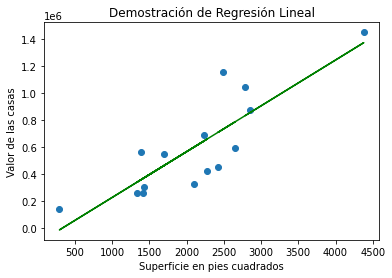

In [ ]:
import matplotlib.pyplot as plt # Esta libreria tiene herramientas para graficar

# Recreamos la misma grafica pero ahora se muestra la recta obtenida

plt.scatter(X,y)
plt.plot(X, y_hat, color='green')

plt.title('Demostración de Regresión Lineal') # Agrego un titulo
plt.ylabel('Valor de las casas') # defino un nombre del eje y
plt.xlabel('Superficie en pies cuadrados') # defino un nombre del eje x

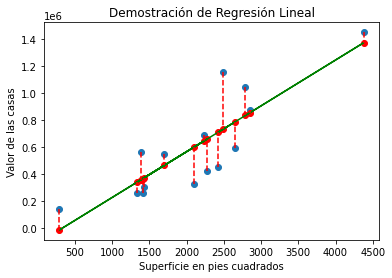

In [ ]:
import matplotlib.pyplot as plt # Esta libreria tiene herramientas para graficar

# Recreamos la misma grafica pero ahora se muestra la recta obtenida

plt.scatter(X,y) # Grafica de dispersion, muestra los puntos iniciales

plt.scatter(X,y_hat, color='red')

# grafica de dispersion, muestra los puntos que se obtienen al sustituir nuestros valores iniciales de X en la ecuacion y = mx + b obtenida mediante regresion

plt.plot(X, y_hat, color='green') # Dibuja la linea de regresion


plt.title('Demostración de Regresión Lineal') # asigna titulo a la grafica
plt.ylabel('Valor de las casas') # asigna nombre al eje y de la grafica
plt.xlabel('Superficie en pies cuadrados') # asigna nombre al eje x de la grafica

# No preocuparse demasiado por esta parte, al igual que las otras graficas no es necesaria
# pero ayuda a visualizar que esta pasando

# Esto es un loop, el cual recorre todos los valores de los conjuntos X, y, y_hat
# a medida que los recorre va dibujando lineas punteadas para ilustrar el error de la regresion
for i in range(0, len(X)):
  point1 = [X[i], y[i]]
  point2 = [X[i], y_hat[i]]

  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]

  plt.plot(x_values, y_values, color='red', linestyle='dashed')



En este momento en la variable y tenemos los valores de precios originales, mientras que en y_hat tenemos los valores de precios obtenidos mediante la regresión lineal. Si comparamos la diferencia entre estos valores podemos obtener el R2 de la recta.


In [ ]:
from sklearn.metrics import r2_score
r2_score(y, y_hat)
# |
# |
# | Deberia aparecer el r2 una vez ejecutes este codigo
# |
# ↓

0.71610957246548

Al momento de escribir este texto el R2 obtenido es de 0.71610957246548, o sea, un gran modelo. :)
Pero es momento de recordar que de los miles de datos del dataset utilizamos solo 15. ¿Qué sucede si los usamos todos?

Text(0.5, 0, 'Superficie en pies cuadrados')

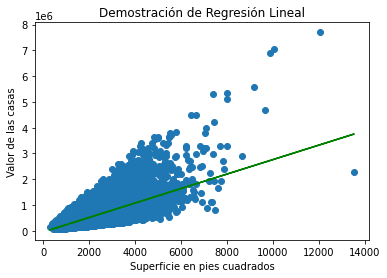

In [ ]:
# Defino nuevos valores de X e y pero con un 1 al final para no repetir nombres de variables

X1 = df['sqft_living'].values.reshape(-1,1)
y1 = df['price']

# vuelvo a usar las herramientas de regresion

reg = LinearRegression().fit(X1,y1)
y_hat1 = reg.predict(X1)

# Y grafico nuevamente
plt.scatter(X1,y1)
plt.plot(X1, y_hat1, color='green')
plt.title('Demostración de Regresión Lineal')
plt.ylabel('Valor de las casas')
plt.xlabel('Superficie en pies cuadrados')

Ahora que tengo todos los datos la recta ya no parece tan representativa, ¿No?

Veamos su valor de R2

In [ ]:
r2_score(y1, y_hat1)
# |
# |
# | Deberia aparecer el r2 una vez ejecutes este codigo
# |
# ↓

0.4928532179037931

El valor de R2 obtenido deberia ser de 0.4928532179037931, un valor mucho menor y no muy útil. ¿Por qué sucede esto?
La respuesta es bastante sencilla, con el primer conjunto de datos tuvimos "suerte" de que los pocos valores caian cerca de la recta. Pero al utilizar todos los datos del dataset se mostró que una recta que considera solo dos variables no es suficiente para predecir de forma adecuada el valor de las casas, resulta que hay muchos otros factores que afectan.

Al imprimir nuevamente las correlaciones podemos ver que hay otras variables que tienen una alta relación con la variable de precio. Todas estas variables también son importantes y no las estamos considerando. Por este motivo,el trabajo consiste en mostrar como hacer regresiones con múltiples variables.

## <font color="red">Conclusiones y trabajo final
</font>



Este ejemplo muestra como la presición de un modelo puede volverse engañosa si tenemos en cuenta solo un subgrupo de datos en lugar de todo el conjunto.
Además comprueba algo que sabemos instintivamente, en ciertas situaciones una variable no es suficiente para poder predecir otra, siendo en este caso la superficie cuadrada de una casa insuficiente para predecir de forma precisa el valor de la misma.

Otro tema a mencionar es que en este ejercicio **no se separó el dataset en conjuntos de entrenamiento y validación**, lo cual haría este modelo poco confiable para predecir valores en casos reales. En este caso esto no es un problema ya que inicialmente se concluyó que una sola variable jamás podría ser suficiente para predecir precios, pero en caso de querer obtener un modelo verdaderamente útil es necesario el realizar esta separacion de datos.

1. EL tarea en esta ultima partes es mostrar el uso de múltiples variables y la separación de datos en conjuntos de entrenamiento y validación.
2. Generar un modelo de regresion lineal multiple con la data de entrenamiento.
2. Realizar la estimación del RMSE y R2.